In [1]:
#!:bash

cp /home/jupyter/mnt/s3/kpd-public-bucket/cifar10-dataset.tar /home/jupyter/work/resources/dataset
cd /home/jupyter/work/resources/dataset
tar xf cifar10-dataset.tar && rm cifar10-dataset.tar

In [2]:
#!c1.32
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Rescaling, \
    Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.data import Dataset

import datetime
import os

print(tf.__version__)

2.6.0


In [3]:
#!c1.32
batch_size = 128
image_size = (32, 32)

In [4]:
#!c1.32
dataset_path = r"dataset"
model_save_path = r"/home/jupyter/mnt/s3/kpd-public-bucket/cifar10-model"

In [5]:
#!c1.32
train_dataset = image_dataset_from_directory(
    os.path.join(dataset_path, "train"),
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=1234,
    validation_split=0
)

valid_dataset = image_dataset_from_directory(
    os.path.join(dataset_path, "test"),
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=1234,
    validation_split=0
)

Found 50000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:864: UserWarning: The following variables cannot be serialized: train_dataset, valid_dataset
  warnings.warn(message)


In [6]:
#!c1.32
class_names = train_dataset.class_names
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:864: UserWarning: The following variables cannot be serialized: train_dataset, valid_dataset
  warnings.warn(message)


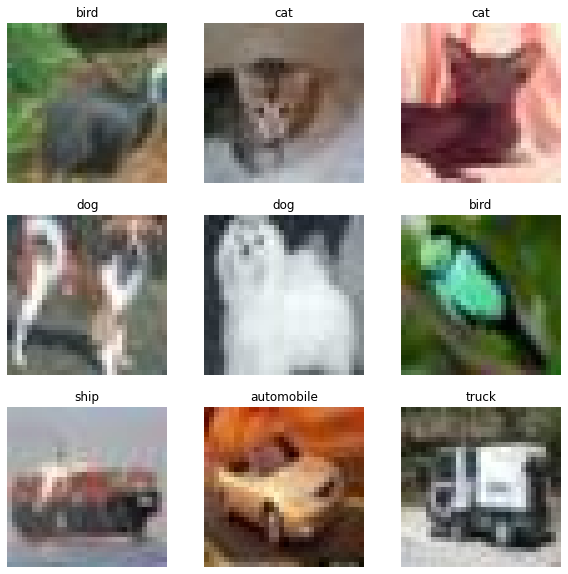

/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:864: UserWarning: The following variables cannot be serialized: train_dataset, valid_dataset
  warnings.warn(message)


In [7]:
#!c1.32
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

In [8]:
#!c1.32
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
valid_dataset = valid_dataset.cache().prefetch(buffer_size=AUTOTUNE)

/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:864: UserWarning: The following variables cannot be serialized: train_dataset, valid_dataset
  warnings.warn(message)


In [9]:
#!c1.32
model = Sequential()

model.add(Input(shape=(32, 32, 3)))
model.add(Rescaling(1.0 / 255))
 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10))

In [10]:
#!c1.32
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

In [11]:
#!c1.32
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
#!c1.32
model.fit(train_dataset, 
          validation_data=valid_dataset,
          shuffle=True,
          epochs=30)

391/391 [==============================] - 418s 1s/step - loss: 0.4605 - accuracy: 0.8511 - val_loss: 1.0118 - val_accuracy: 0.7376
Epoch 17/30
391/391 [==============================] - 417s 1s/step - loss: 0.4313 - accuracy: 0.8592 - val_loss: 0.8263 - val_accuracy: 0.7833
Epoch 18/30
391/391 [==============================] - 401s 1s/step - loss: 0.3926 - accuracy: 0.8742 - val_loss: 0.7809 - val_accuracy: 0.7896
Epoch 19/30
391/391 [==============================] - 399s 1s/step - loss: 0.3746 - accuracy: 0.8796 - val_loss: 0.7330 - val_accuracy: 0.7974
Epoch 20/30
391/391 [==============================] - 400s 1s/step - loss: 0.3440 - accuracy: 0.8902 - val_loss: 0.7498 - val_accuracy: 0.8027
Epoch 21/30
391/391 [==============================] - 401s 1s/step - loss: 0.3185 - accuracy: 0.8977 - val_loss: 0.8099 - val_accuracy: 0.8028
Epoch 22/30
391/391 [==============================] - 399s 1s/step - loss: 0.3274 - accuracy: 0.8989 - val_loss: 0.7057 - val_accuracy: 0.8056
Epoc

/kernel/lib/python3.8/site-packages/ml_kernel/kernel.py:864: UserWarning: The following variables cannot be serialized: train_dataset, valid_dataset
  warnings.warn(message)


In [13]:
#!c1.32
model.save("models/cifar10-model")

INFO:tensorflow:Assets written to: models/cifar10-model/assets


In [17]:
#!c1.32
import zipfile
import os
import sys

def zipfolder(foldername, target_dir):            
    zipobj = zipfile.ZipFile(foldername + '.zip', 'w', zipfile.ZIP_DEFLATED)
    rootlen = len(target_dir) + 1
    for base, dirs, files in os.walk(target_dir):
        for file in files:
            fn = os.path.join(base, file)
            zipobj.write(fn, fn[rootlen:])

zipfolder(model_save_path, "models/cifar10-model")